<a href="https://www.kaggle.com/code/nomanrafi28/cryptocurrency-patterns?scriptVersionId=208632746" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from statsmodels.tsa.statespace.sarimax import SARIMAX
from scipy.special import inv_boxcox
from scipy.stats import boxcox
from datetime import datetime

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/nomanrafi/A-Comprehensive-Analysis-of-Cryptocurrency-Price-Patterns/refs/heads/main/cryptocurrency_dataset.csv')

In [3]:
df

,Unnamed: 0,open,high,low,close,volume,marketCap,timestamp,crypto_name,date
0,0,112.900002,118.800003,107.142998,115.910004,0.000000e+00,1.288693e+09,2013-05-05T23:59:59.999Z,Bitcoin,2013-05-05
1,1,3.493130,3.692460,3.346060,3.590890,0.000000e+00,6.229819e+07,2013-05-05T23:59:59.999Z,Litecoin,2013-05-05
2,2,115.980003,124.663002,106.639999,112.300003,0.000000e+00,1.249023e+09,2013-05-06T23:59:59.999Z,Bitcoin,2013-05-06
3,3,3.594220,3.781020,3.116020,3.371250,0.000000e+00,5.859436e+07,2013-05-06T23:59:59.999Z,Litecoin,2013-05-06
4,4,112.250000,113.444000,97.699997,111.500000,0.000000e+00,1.240594e+09,2013-05-07T23:59:59.999Z,Bitcoin,2013-05-07
...,...,...,...,...,...,...,...,...,...,...
72941,72941,0.022604,0.022988,0.022197,0.022796,4.040134e+07,1.652957e+09,2022-10-23T23:59:59.999Z,VeChain,2022-10-23
72942,72942,1.468244,1.530464,1.435415,1.517878,2.844351e+07,1.572825e+09,2022-10-23T23:59:59.999Z,Flow,2022-10-23
72943,72943,4.950431,5.148565,4.945280,5.117206,1.069497e+08,1.559551e+09,2022-10-23T23:59:59.999Z,Filecoin,2022-10-23
72944,72944,0.000233,0.000243,0.000226,0.000239,2.143268e+08,1.576291e+09,2022-10-23T23:59:59.999Z,Terra Classic,2022-10-23


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72946 entries, 0 to 72945
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   72946 non-null  int64  
 1   open         72946 non-null  float64
 2   high         72946 non-null  float64
 3   low          72946 non-null  float64
 4   close        72946 non-null  float64
 5   volume       72946 non-null  float64
 6   marketCap    72946 non-null  float64
 7   timestamp    72946 non-null  object 
 8   crypto_name  72946 non-null  object 
 9   date         72946 non-null  object 
dtypes: float64(6), int64(1), object(3)
memory usage: 5.6+ MB


In [5]:
df.describe()

,Unnamed: 0,open,high,low,close,volume,marketCap
count,72946.000000,72946.000000,7.294600e+04,72946.000000,7.294600e+04,7.294600e+04,7.294600e+04
mean,36472.500000,870.194495,8.964124e+02,844.060640,8.712949e+02,2.207607e+09,1.474922e+10
std,21057.840705,5231.654470,5.398613e+03,5079.389387,5.235508e+03,9.617885e+09,7.501159e+10
min,0.000000,0.000000,1.022100e-10,0.000000,8.292000e-11,0.000000e+00,0.000000e+00
25%,18236.250000,0.167916,1.767999e-01,0.158630,1.682982e-01,8.320618e+06,1.860432e+08
50%,36472.500000,1.630666,1.717542e+00,1.541486,1.640219e+00,1.098756e+08,1.268539e+09
75%,54708.750000,26.070557,2.756868e+01,24.791776,2.625195e+01,6.691398e+08,5.118618e+09
max,72945.000000,67549.735581,1.621883e+05,66458.723733,6.756683e+04,3.509679e+11,1.274831e+12


In [6]:
df.head()

,Unnamed: 0,open,high,low,close,volume,marketCap,timestamp,crypto_name,date
0,0,112.900002,118.800003,107.142998,115.910004,0.0,1.288693e+09,2013-05-05T23:59:59.999Z,Bitcoin,2013-05-05
1,1,3.493130,3.692460,3.346060,3.590890,0.0,6.229819e+07,2013-05-05T23:59:59.999Z,Litecoin,2013-05-05
2,2,115.980003,124.663002,106.639999,112.300003,0.0,1.249023e+09,2013-05-06T23:59:59.999Z,Bitcoin,2013-05-06
3,3,3.594220,3.781020,3.116020,3.371250,0.0,5.859436e+07,2013-05-06T23:59:59.999Z,Litecoin,2013-05-06
4,4,112.250000,113.444000,97.699997,111.500000,0.0,1.240594e+09,2013-05-07T23:59:59.999Z,Bitcoin,2013-05-07


In [7]:
df.tail()

,Unnamed: 0,open,high,low,close,volume,marketCap,timestamp,crypto_name,date
72941,72941,0.022604,0.022988,0.022197,0.022796,4.040134e+07,1.652957e+09,2022-10-23T23:59:59.999Z,VeChain,2022-10-23
72942,72942,1.468244,1.530464,1.435415,1.517878,2.844351e+07,1.572825e+09,2022-10-23T23:59:59.999Z,Flow,2022-10-23
72943,72943,4.950431,5.148565,4.945280,5.117206,1.069497e+08,1.559551e+09,2022-10-23T23:59:59.999Z,Filecoin,2022-10-23
72944,72944,0.000233,0.000243,0.000226,0.000239,2.143268e+08,1.576291e+09,2022-10-23T23:59:59.999Z,Terra Classic,2022-10-23
72945,72945,0.465490,0.471006,0.453438,0.469033,9.509743e+08,2.339868e+10,2022-10-23T23:59:59.999Z,XRP,2022-10-23


In [8]:
df.isnull().sum()

Unnamed: 0     0
open           0
high           0
low            0
close          0
volume         0
marketCap      0
timestamp      0
crypto_name    0
date           0
dtype: int64

In [9]:
df.columns

Index(['Unnamed: 0', 'open', 'high', 'low', 'close', 'volume', 'marketCap',
       'timestamp', 'crypto_name', 'date'],
      dtype='object')

In [10]:
df.shape

(72946, 10)

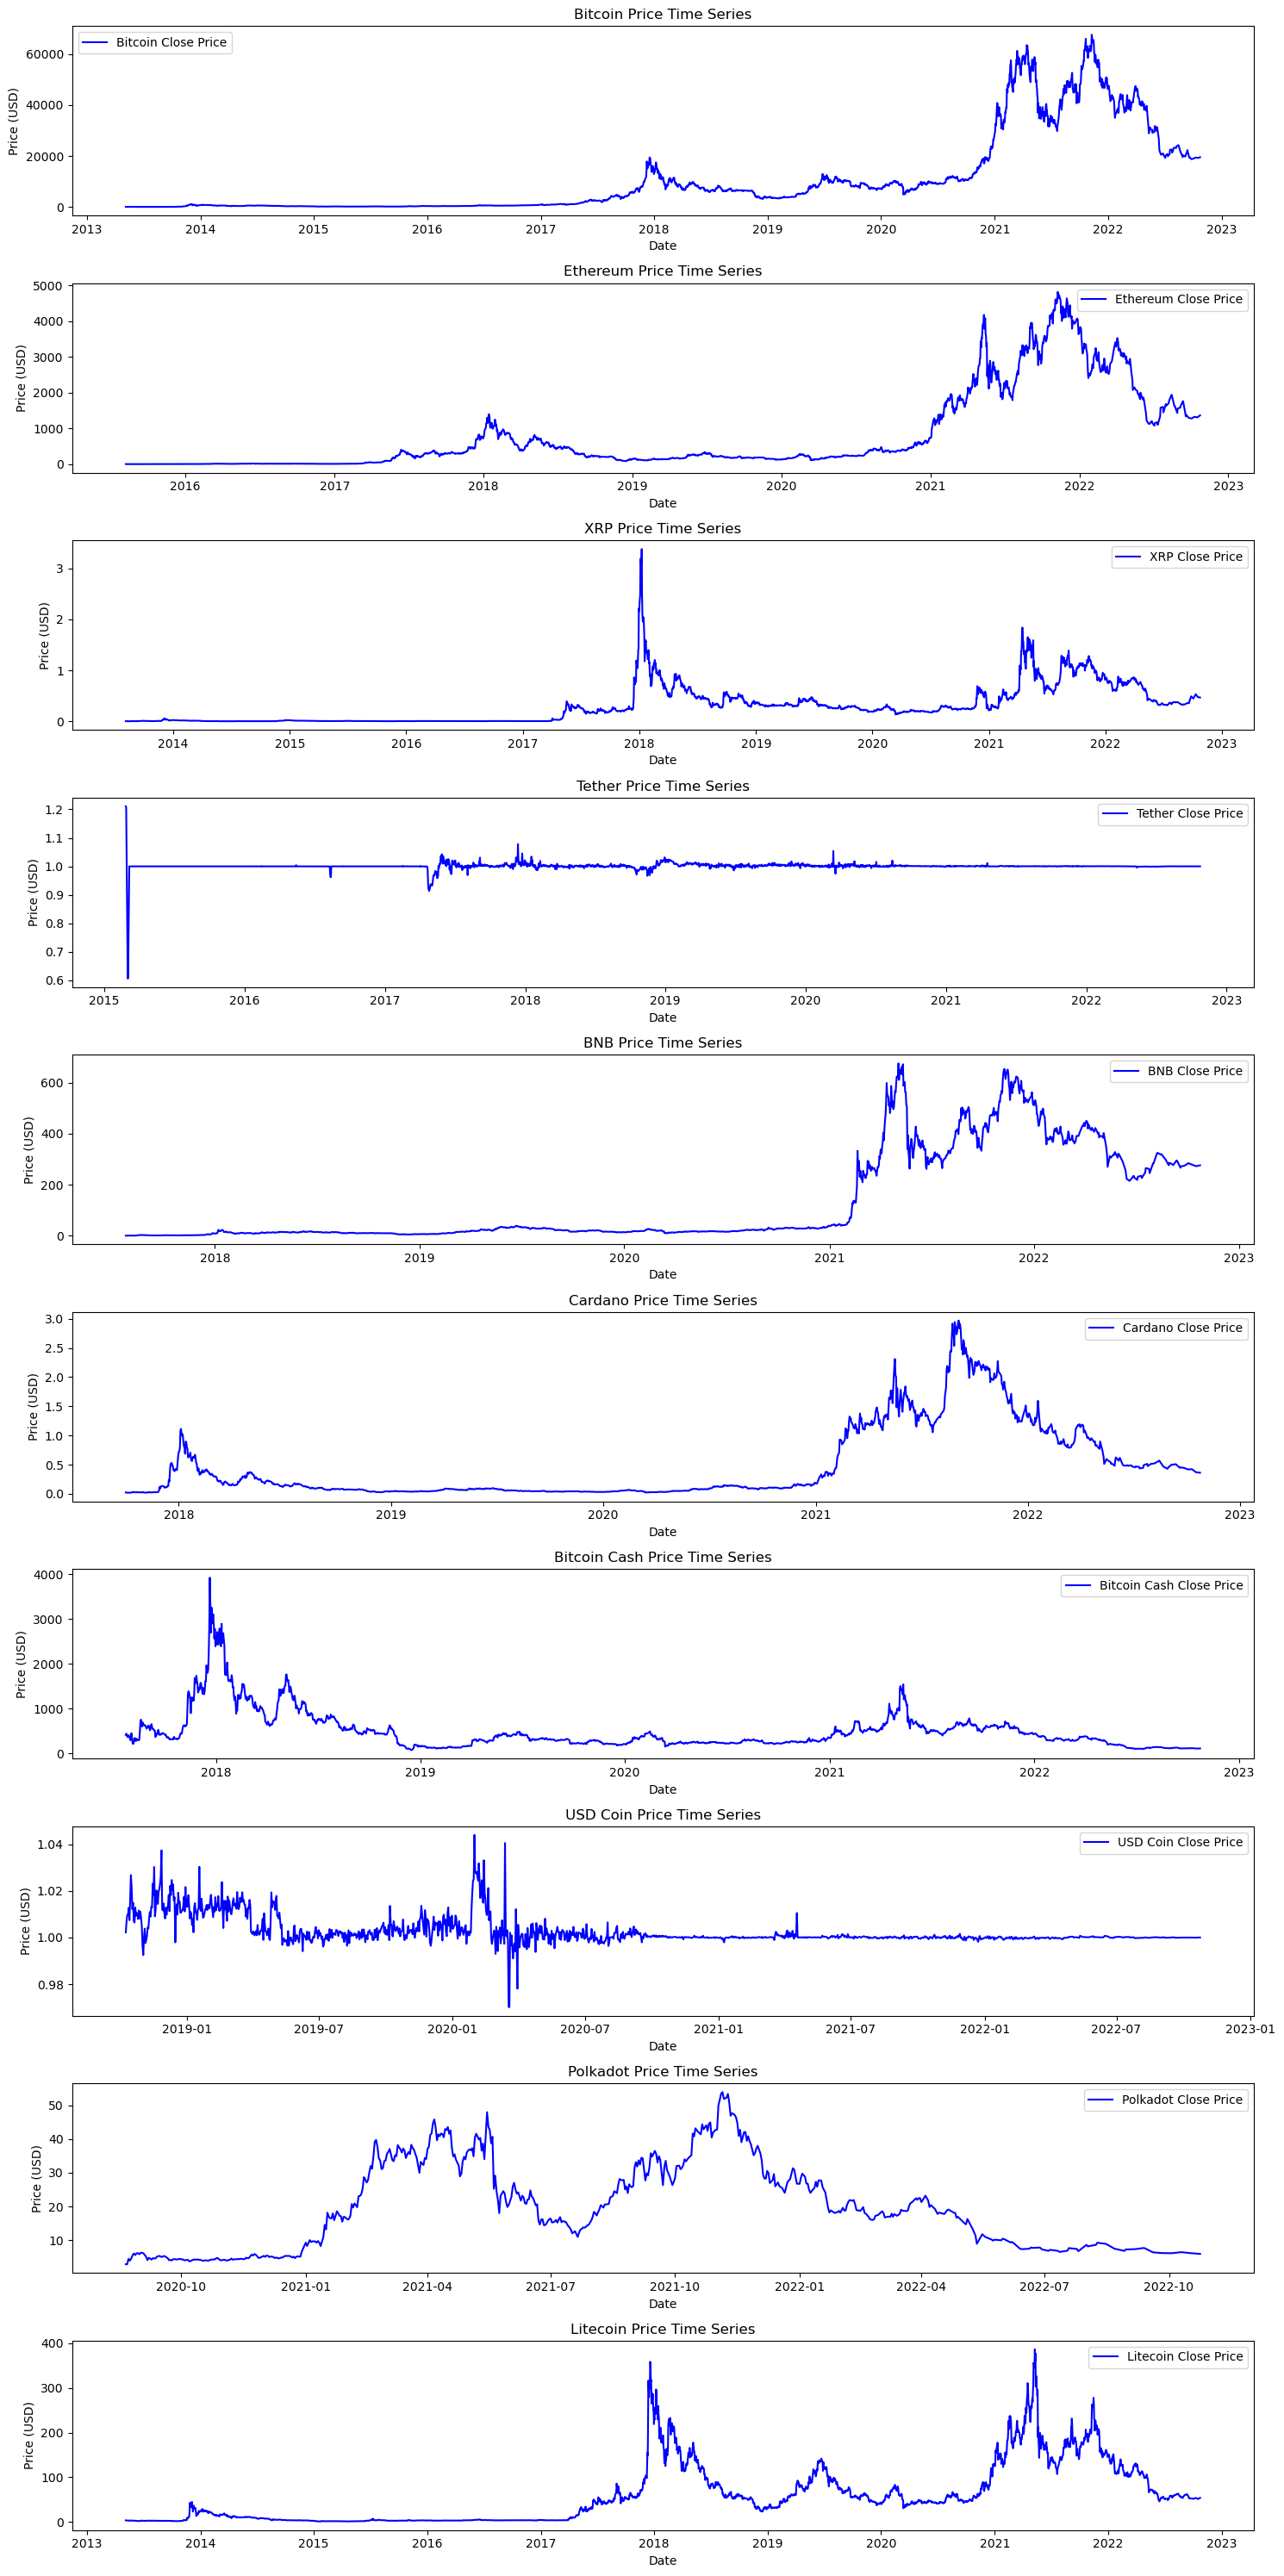

In [11]:
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Identify the top 10 cryptocurrencies by total market capitalization
top_cryptos = (
    df.groupby('crypto_name')['marketCap']
    .sum()
    .nlargest(10)
    .index
)

# Filter the dataset for the top cryptocurrencies
top_cryptos_data = df[df['crypto_name'].isin(top_cryptos)]

# Plot time series for each cryptocurrency
plt.figure(figsize=(15, 30))
for i, crypto in enumerate(top_cryptos, 1):
    plt.subplot(10, 1, i)  # 10 rows, 1 column, current plot index
    crypto_data = top_cryptos_data[top_cryptos_data['crypto_name'] == crypto]
    plt.plot(crypto_data['timestamp'], crypto_data['close'], color='blue', label=f'{crypto} Close Price')
    plt.title(f'{crypto} Price Time Series')
    plt.xlabel('Date')
    plt.ylabel('Price (USD)')
    plt.legend()
    plt.tight_layout()  # Adjust layout to prevent overlap

plt.show()

In [12]:
df.drop(columns=['Unnamed: 0', 'timestamp'], inplace=True)
df['date'] = pd.to_datetime(df['date'])

In [13]:
df.drop_duplicates(inplace=True)

In [14]:
df.shape

(72946, 8)

In [15]:
df

,open,high,low,close,volume,marketCap,crypto_name,date
0,112.900002,118.800003,107.142998,115.910004,0.000000e+00,1.288693e+09,Bitcoin,2013-05-05
1,3.493130,3.692460,3.346060,3.590890,0.000000e+00,6.229819e+07,Litecoin,2013-05-05
2,115.980003,124.663002,106.639999,112.300003,0.000000e+00,1.249023e+09,Bitcoin,2013-05-06
3,3.594220,3.781020,3.116020,3.371250,0.000000e+00,5.859436e+07,Litecoin,2013-05-06
4,112.250000,113.444000,97.699997,111.500000,0.000000e+00,1.240594e+09,Bitcoin,2013-05-07
...,...,...,...,...,...,...,...,...
72941,0.022604,0.022988,0.022197,0.022796,4.040134e+07,1.652957e+09,VeChain,2022-10-23
72942,1.468244,1.530464,1.435415,1.517878,2.844351e+07,1.572825e+09,Flow,2022-10-23
72943,4.950431,5.148565,4.945280,5.117206,1.069497e+08,1.559551e+09,Filecoin,2022-10-23
72944,0.000233,0.000243,0.000226,0.000239,2.143268e+08,1.576291e+09,Terra Classic,2022-10-23


# Handle outliers by capping extreme values (99th percentile)

In [16]:
for column in ['volume', 'marketCap', 'open', 'high', 'low']:
    upper_limit = df[column].quantile(0.99)
    df[column] = np.clip(df[column], a_min=0, a_max=upper_limit)

# Label Encoder

In [17]:
label_encoder = LabelEncoder()
df['crypto_name'] = label_encoder.fit_transform(df['crypto_name'])

In [18]:
df

,open,high,low,close,volume,marketCap,crypto_name,date
0,112.900002,118.800003,107.142998,115.910004,0.000000e+00,1.288693e+09,8,2013-05-05
1,3.493130,3.692460,3.346060,3.590890,0.000000e+00,6.229819e+07,30,2013-05-05
2,115.980003,124.663002,106.639999,112.300003,0.000000e+00,1.249023e+09,8,2013-05-06
3,3.594220,3.781020,3.116020,3.371250,0.000000e+00,5.859436e+07,30,2013-05-06
4,112.250000,113.444000,97.699997,111.500000,0.000000e+00,1.240594e+09,8,2013-05-07
...,...,...,...,...,...,...,...,...
72941,0.022604,0.022988,0.022197,0.022796,4.040134e+07,1.652957e+09,53,2022-10-23
72942,1.468244,1.530464,1.435415,1.517878,2.844351e+07,1.572825e+09,26,2022-10-23
72943,4.950431,5.148565,4.945280,5.117206,1.069497e+08,1.559551e+09,25,2022-10-23
72944,0.000233,0.000243,0.000226,0.000239,2.143268e+08,1.576291e+09,44,2022-10-23


# Create new features for better analysis

In [19]:
df['price_range'] = df['high'] - df['low']
df['average_price'] = (df['open'] + df['close']) / 2

In [20]:
df

,open,high,low,close,volume,marketCap,crypto_name,date,price_range,average_price
0,112.900002,118.800003,107.142998,115.910004,0.000000e+00,1.288693e+09,8,2013-05-05,11.657005,114.405003
1,3.493130,3.692460,3.346060,3.590890,0.000000e+00,6.229819e+07,30,2013-05-05,0.346400,3.542010
2,115.980003,124.663002,106.639999,112.300003,0.000000e+00,1.249023e+09,8,2013-05-06,18.023003,114.140003
3,3.594220,3.781020,3.116020,3.371250,0.000000e+00,5.859436e+07,30,2013-05-06,0.665000,3.482735
4,112.250000,113.444000,97.699997,111.500000,0.000000e+00,1.240594e+09,8,2013-05-07,15.744003,111.875000
...,...,...,...,...,...,...,...,...,...,...
72941,0.022604,0.022988,0.022197,0.022796,4.040134e+07,1.652957e+09,53,2022-10-23,0.000791,0.022700
72942,1.468244,1.530464,1.435415,1.517878,2.844351e+07,1.572825e+09,26,2022-10-23,0.095049,1.493061
72943,4.950431,5.148565,4.945280,5.117206,1.069497e+08,1.559551e+09,25,2022-10-23,0.203285,5.033818
72944,0.000233,0.000243,0.000226,0.000239,2.143268e+08,1.576291e+09,44,2022-10-23,0.000017,0.000236


In [21]:
df.drop(columns=['date'], inplace=True)

In [22]:
df

,open,high,low,close,volume,marketCap,crypto_name,price_range,average_price
0,112.900002,118.800003,107.142998,115.910004,0.000000e+00,1.288693e+09,8,11.657005,114.405003
1,3.493130,3.692460,3.346060,3.590890,0.000000e+00,6.229819e+07,30,0.346400,3.542010
2,115.980003,124.663002,106.639999,112.300003,0.000000e+00,1.249023e+09,8,18.023003,114.140003
3,3.594220,3.781020,3.116020,3.371250,0.000000e+00,5.859436e+07,30,0.665000,3.482735
4,112.250000,113.444000,97.699997,111.500000,0.000000e+00,1.240594e+09,8,15.744003,111.875000
...,...,...,...,...,...,...,...,...,...
72941,0.022604,0.022988,0.022197,0.022796,4.040134e+07,1.652957e+09,53,0.000791,0.022700
72942,1.468244,1.530464,1.435415,1.517878,2.844351e+07,1.572825e+09,26,0.095049,1.493061
72943,4.950431,5.148565,4.945280,5.117206,1.069497e+08,1.559551e+09,25,0.203285,5.033818
72944,0.000233,0.000243,0.000226,0.000239,2.143268e+08,1.576291e+09,44,0.000017,0.000236


In [23]:
correlation_matrix = df[['open', 'high', 'low', 'close', 'volume', 'marketCap', 'price_range', 'average_price']].corr()

In [24]:
df

,open,high,low,close,volume,marketCap,crypto_name,price_range,average_price
0,112.900002,118.800003,107.142998,115.910004,0.000000e+00,1.288693e+09,8,11.657005,114.405003
1,3.493130,3.692460,3.346060,3.590890,0.000000e+00,6.229819e+07,30,0.346400,3.542010
2,115.980003,124.663002,106.639999,112.300003,0.000000e+00,1.249023e+09,8,18.023003,114.140003
3,3.594220,3.781020,3.116020,3.371250,0.000000e+00,5.859436e+07,30,0.665000,3.482735
4,112.250000,113.444000,97.699997,111.500000,0.000000e+00,1.240594e+09,8,15.744003,111.875000
...,...,...,...,...,...,...,...,...,...
72941,0.022604,0.022988,0.022197,0.022796,4.040134e+07,1.652957e+09,53,0.000791,0.022700
72942,1.468244,1.530464,1.435415,1.517878,2.844351e+07,1.572825e+09,26,0.095049,1.493061
72943,4.950431,5.148565,4.945280,5.117206,1.069497e+08,1.559551e+09,25,0.203285,5.033818
72944,0.000233,0.000243,0.000226,0.000239,2.143268e+08,1.576291e+09,44,0.000017,0.000236


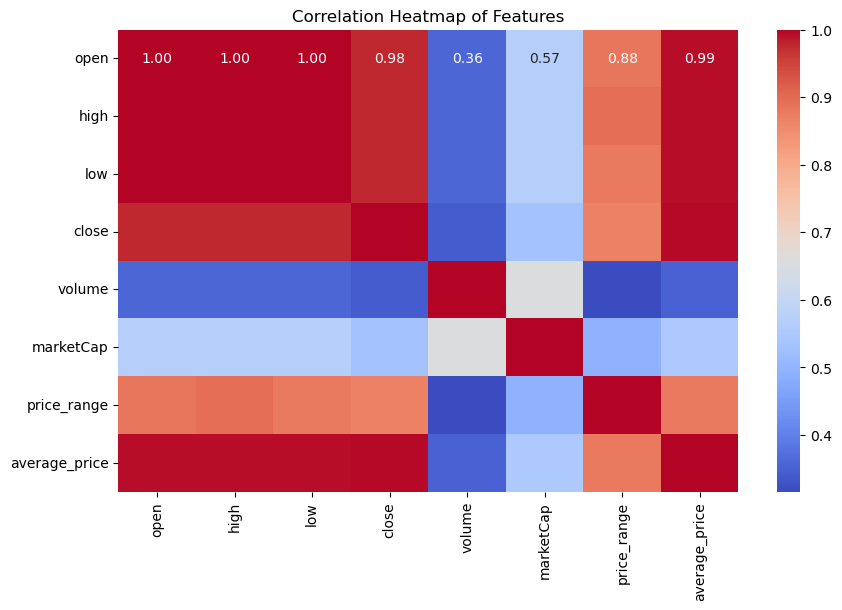

In [25]:
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title("Correlation Heatmap of Features")
plt.show()

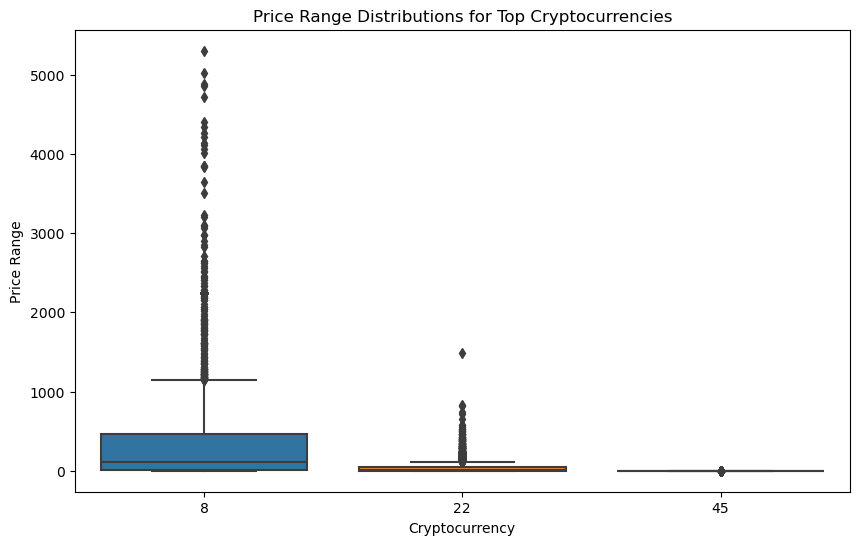

In [26]:
top_cryptos = df.groupby('crypto_name')['volume'].sum().nlargest(3).index
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[df['crypto_name'].isin(top_cryptos)], x='crypto_name', y='price_range')
plt.title("Price Range Distributions for Top Cryptocurrencies")
plt.xlabel("Cryptocurrency")
plt.ylabel("Price Range")
plt.show()

C:\Users\noman\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


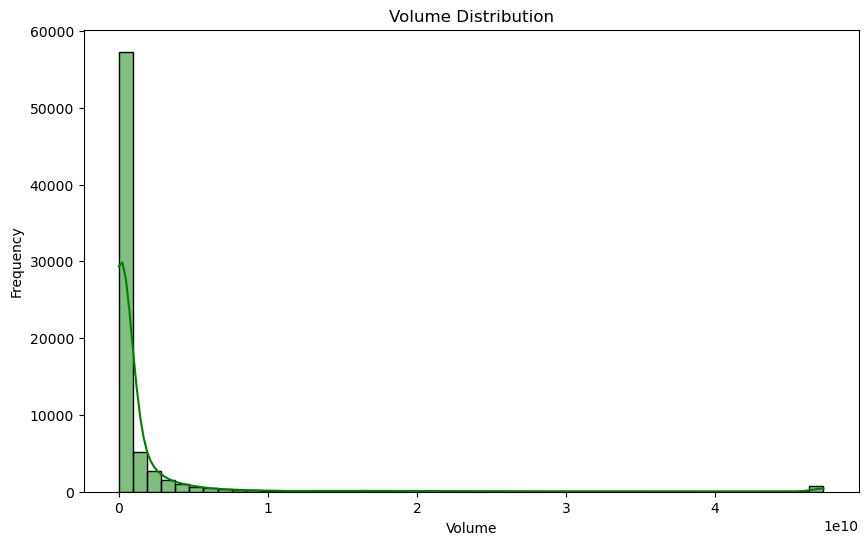

In [27]:
plt.figure(figsize=(10, 6))
sns.histplot(df['volume'], bins=50, kde=True, color='green')
plt.title("Volume Distribution")
plt.xlabel("Volume")
plt.ylabel("Frequency")
plt.show()

In [28]:
X = df.drop(columns=['close'])
y = df['close']

In [29]:
df.shape

(72946, 9)

In [30]:
X.shape

(72946, 8)

In [31]:
y.shape

(72946,)

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [33]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [34]:
X_train_scaled

array([[-0.18353707, -0.18364855, -0.18380502, ..., -0.55667654,
        -0.1699654 , -0.17424694],
       [-0.18325314, -0.18334935, -0.18348704, ...,  0.09063672,
        -0.16995047, -0.17398717],
       [-0.18393446, -0.18403678, -0.18419015, ...,  1.06160661,
        -0.1703732 , -0.17459159],
       ...,
       [-0.18393462, -0.18403698, -0.18419019, ..., -1.39818378,
        -0.1703756 , -0.17459169],
       [-0.04010965, -0.03454741, -0.03931356, ..., -1.33345245,
         0.03500561, -0.04604871],
       [-0.18418462, -0.18427983, -0.18444907, ..., -0.62140786,
        -0.17037666, -0.17480921]])

In [35]:
X_test_scaled

array([[-0.0741728 , -0.07669491, -0.07617683, ..., -1.52764643,
        -0.07923051, -0.08120441],
       [-0.13730215, -0.13844574, -0.137649  , ..., -0.42721388,
        -0.14106464, -0.13459029],
       [-0.18340159, -0.18351841, -0.18372256, ...,  1.32053192,
        -0.1691691 , -0.17415908],
       ...,
       [-0.18402277, -0.18412253, -0.18429745, ...,  1.70891988,
        -0.17014882, -0.17467373],
       [-0.18416524, -0.18426053, -0.18442905, ..., -1.2039898 ,
        -0.17036878, -0.17479228],
       [-0.1841803 , -0.18427535, -0.18444468, ...,  0.47902468,
        -0.17037114, -0.17480534]])

In [36]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

RandomForestRegressor(random_state=42)

In [37]:
y_pred = model.predict(X_test_scaled)

In [38]:
model.score(X_test_scaled, y_test)

0.9996809482934046

In [39]:
LR = LinearRegression()
LR.fit(X_train_scaled,y_train)

LinearRegression()

In [40]:
LR.score(X_test_scaled,y_test)

1.0

# Actual vs Predicted close price

Mean Absolute Error (Test): 5.277200640638655
Mean Squared Error (Test): 8875.758520390164
R² Score (Test): 0.9996809482934046


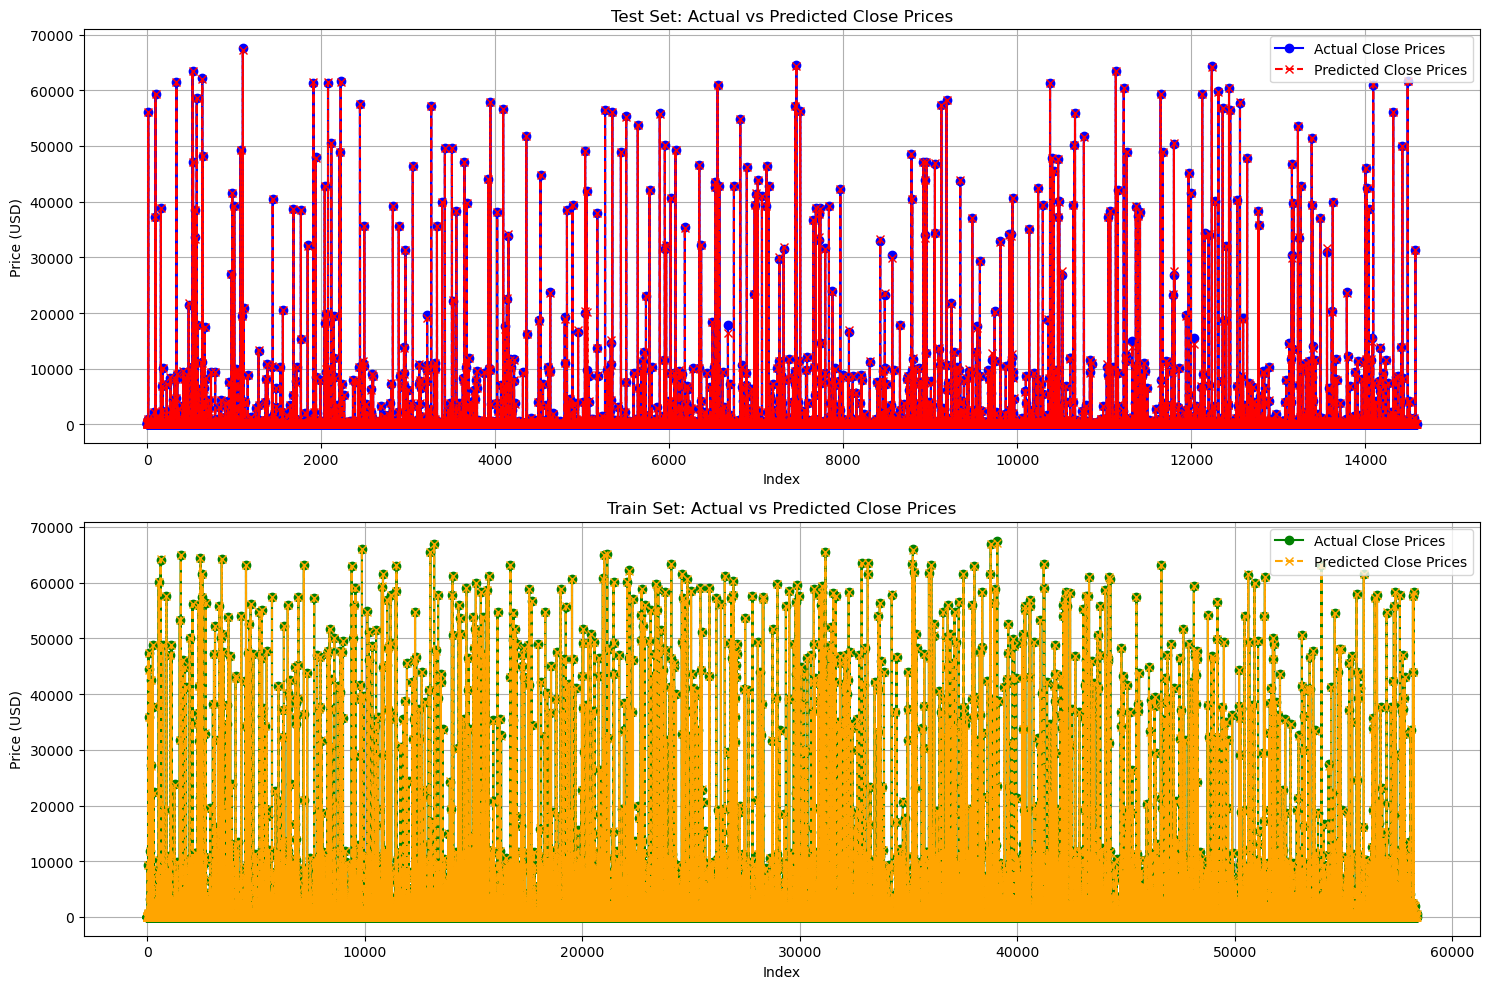

In [41]:
y_train_pred = model.predict(X_train_scaled)  
y_test_pred = model.predict(X_test_scaled)

mae = mean_absolute_error(y_test, y_test_pred)
mse = mean_squared_error(y_test, y_test_pred)
r2 = r2_score(y_test, y_test_pred)

print(f"Mean Absolute Error (Test): {mae}")
print(f"Mean Squared Error (Test): {mse}")
print(f"R² Score (Test): {r2}")

plt.figure(figsize=(15, 10))

plt.subplot(2, 1, 1)
plt.plot(y_test.values, label='Actual Close Prices', color='blue', marker='o')
plt.plot(y_test_pred, label='Predicted Close Prices', color='red', linestyle='--', marker='x')
plt.title('Test Set: Actual vs Predicted Close Prices')
plt.xlabel('Index')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid()

plt.subplot(2, 1, 2)
plt.plot(y_train.values, label='Actual Close Prices', color='green', marker='o')
plt.plot(y_train_pred, label='Predicted Close Prices', color='orange', linestyle='--', marker='x')
plt.title('Train Set: Actual vs Predicted Close Prices')
plt.xlabel('Index')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

# Evaluate the model

In [42]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")

Mean Squared Error: 8875.758520390164
R² Score: 0.9996809482934046


# Feature importance

In [43]:
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': model.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Visualization: Feature importance

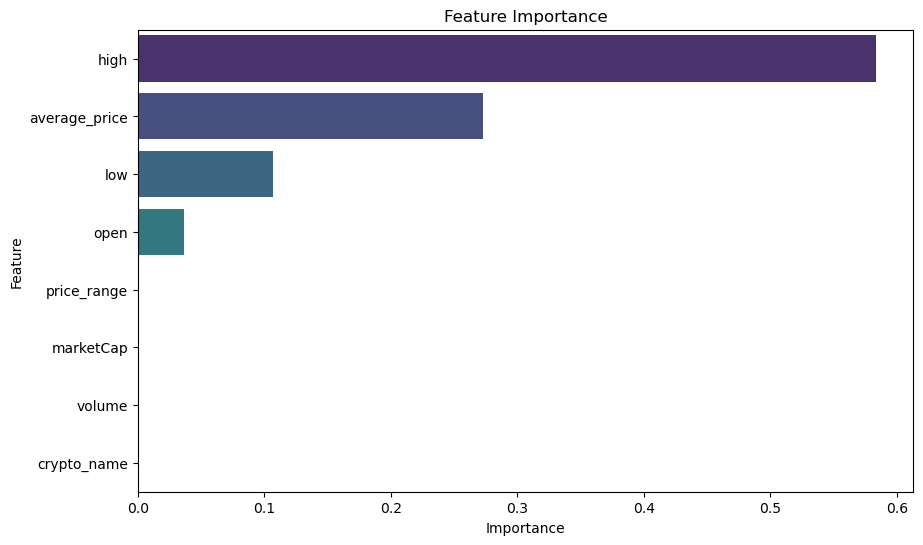

In [44]:
plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importances, x='Importance', y='Feature', palette='viridis')
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

# Visualization: Actual vs Predicted

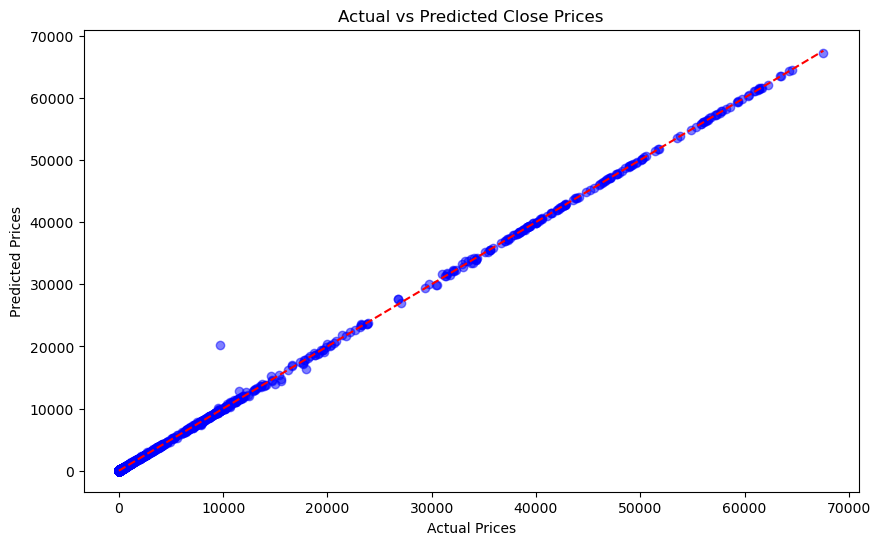

In [45]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color='blue')
plt.title('Actual vs Predicted Close Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.show()

# Steps to Detect and Address Overfitting

In [ ]:
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(model, X, y, cv=5, scoring='r2')
print(f"Cross-Validation R² Scores: {cv_scores}")
print(f"Mean CV R² Score: {np.mean(cv_scores)}")

In [ ]:
# df = pd.get_dummies(df, columns=['timestamp'])
# df = pd.get_dummies(df, columns=['crypto_name'])
# df = pd.get_dummies(df, columns=['date'])